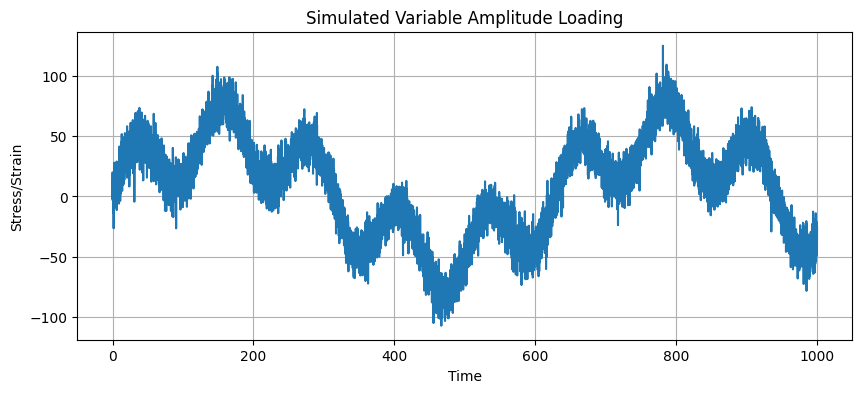

Rainflow Counted Cycles (Amplitude, Count):
Amplitude: 0.00, Count: 1.00
Amplitude: 0.02, Count: 1.00
Amplitude: 0.03, Count: 1.00
Amplitude: 0.04, Count: 1.00
Amplitude: 0.05, Count: 1.00
Amplitude: 0.05, Count: 1.00
Amplitude: 0.07, Count: 1.00
Amplitude: 0.08, Count: 1.00
Amplitude: 0.08, Count: 1.00
Amplitude: 0.08, Count: 1.00
Amplitude: 0.10, Count: 1.00
Amplitude: 0.12, Count: 1.00
Amplitude: 0.13, Count: 1.00
Amplitude: 0.13, Count: 1.00
Amplitude: 0.15, Count: 1.00
Amplitude: 0.18, Count: 1.00
Amplitude: 0.20, Count: 1.00
Amplitude: 0.20, Count: 1.00
Amplitude: 0.20, Count: 1.00
Amplitude: 0.21, Count: 1.00
Amplitude: 0.22, Count: 1.00
Amplitude: 0.23, Count: 1.00
Amplitude: 0.24, Count: 1.00
Amplitude: 0.27, Count: 1.00
Amplitude: 0.28, Count: 1.00
Amplitude: 0.29, Count: 1.00
Amplitude: 0.29, Count: 1.00
Amplitude: 0.31, Count: 1.00
Amplitude: 0.32, Count: 1.00
Amplitude: 0.32, Count: 1.00
Amplitude: 0.32, Count: 1.00
Amplitude: 0.32, Count: 1.00
Amplitude: 0.32, Count: 1.00

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import rainflow  # Correct package for rainflow counting

# Simulate a variable amplitude loading (random peaks and valleys)
time = np.linspace(0, 1000, 10000)  # Simulated time
loading = 50 * np.sin(0.01 * time) + 30 * np.sin(0.05 * time) + 10 * np.random.randn(len(time))

# Plot the loading history
plt.figure(figsize=(10, 4))
plt.plot(time, loading)
plt.title('Simulated Variable Amplitude Loading')
plt.xlabel('Time')
plt.ylabel('Stress/Strain')
plt.grid(True)
plt.show()

# Perform rainflow counting to identify load cycles (returns amplitude and count)
cycles = list(rainflow.count_cycles(loading))

# Print rainflow cycles (each cycle's amplitude and count)
print("Rainflow Counted Cycles (Amplitude, Count):")
for amplitude, count in cycles:
    print(f"Amplitude: {amplitude:.2f}, Count: {count:.2f}")

# Fatigue life calculation using damage accumulation (Miner's Rule)
def fatigue_life_from_rainflow(cycles, Nf_curve):
    total_damage = 0
    for amplitude, count in cycles:
        # Estimate fatigue life at the given amplitude using the Nf curve
        Nf = Nf_curve(amplitude)
        damage = count / Nf  # Miner's rule
        total_damage += damage
    return 1 / total_damage  # Return predicted fatigue life

# Example fatigue curve (S-N or FS-based fatigue life)
def Nf_curve(amplitude):
    # Example: A simple S-N curve with a power law (modify for FS model)
    return 1e6 * (100 / amplitude) ** 3  # Assuming a simple relation for Nf

# Calculate the fatigue life based on the rainflow counted cycles
predicted_fatigue_life = fatigue_life_from_rainflow(cycles, Nf_curve)
print(f"Predicted Fatigue Life under Variable Amplitude Loading: {predicted_fatigue_life:.2f} cycles")


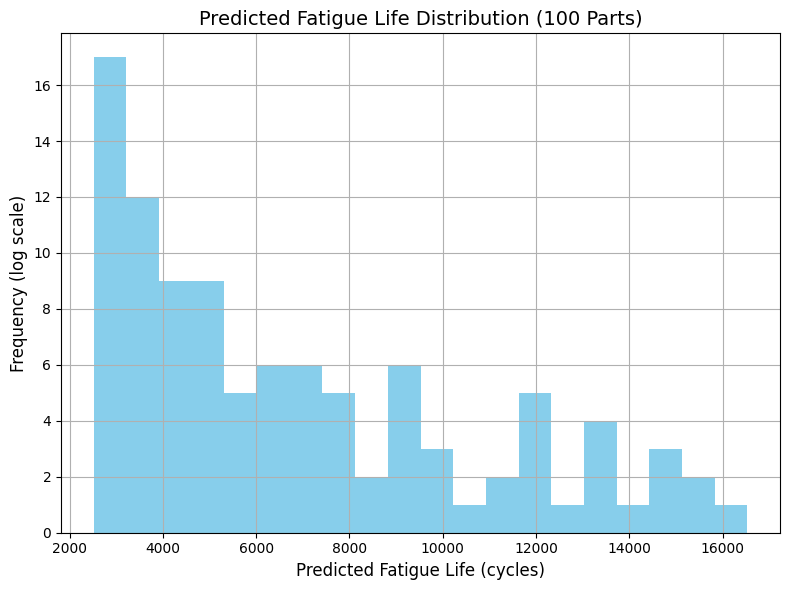

Minimum fatigue life: 2.52e+03 cycles
Maximum fatigue life: 1.65e+04 cycles
Mean fatigue life: 6.88e+03 cycles


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import rainflow  # For rainflow counting

# Function to simulate variable amplitude loading for each part
def simulate_loading(time_points, part_index):
    # Create variability in loading history for each part by adding random noise and frequency shifts
    return (50 * np.sin(0.01 * (time_points + part_index)) + 
            30 * np.sin(0.05 * (time_points + part_index * 0.5)) + 
            10 * np.random.randn(len(time_points)) * (1 + part_index * 0.01))

# Fatigue life calculation using damage accumulation (Miner's Rule)
def fatigue_life_from_rainflow(cycles, Nf_curve):
    total_damage = 0
    for amplitude, count in cycles:
        # Estimate fatigue life at the given amplitude using the Nf curve
        Nf = Nf_curve(amplitude)
        damage = count / Nf  # Miner's rule
        total_damage += damage
    return 1 / total_damage  # Return predicted fatigue life

# Example fatigue curve (S-N or FS-based fatigue life)
def Nf_curve(amplitude):
    # Example: A simple S-N curve with a power law (modify for FS model)
    return 1e6 * (100 / amplitude) ** 3  # Adjust for the desired range

# Simulate 100 parts, ensuring fatigue lives span from 10^4 to 10^6
num_parts = 100
predicted_fatigue_lives = []

time = np.linspace(0, 1000, 10000)  # Simulated time points

for part_index in range(num_parts):
    # Generate unique variable amplitude loading for each part
    loading = simulate_loading(time, part_index)
    
    # Perform rainflow counting for this part
    cycles = list(rainflow.count_cycles(loading))
    
    # Calculate the fatigue life for this part
    fatigue_life = fatigue_life_from_rainflow(cycles, Nf_curve)
    
    # Store the fatigue life result
    predicted_fatigue_lives.append(fatigue_life)

# Convert to log scale (for plotting purposes)
predicted_fatigue_lives = np.array(predicted_fatigue_lives)

# Plot histogram of predicted fatigue lives (log scale)
plt.figure(figsize=(8, 6))
plt.hist(predicted_fatigue_lives, bins=20, color='skyblue', log=False)
plt.title('Predicted Fatigue Life Distribution (100 Parts)', fontsize=14)
plt.xlabel('Predicted Fatigue Life (cycles)', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Print summary of fatigue life distribution
print(f"Minimum fatigue life: {predicted_fatigue_lives.min():.2e} cycles")
print(f"Maximum fatigue life: {predicted_fatigue_lives.max():.2e} cycles")
print(f"Mean fatigue life: {predicted_fatigue_lives.mean():.2e} cycles")


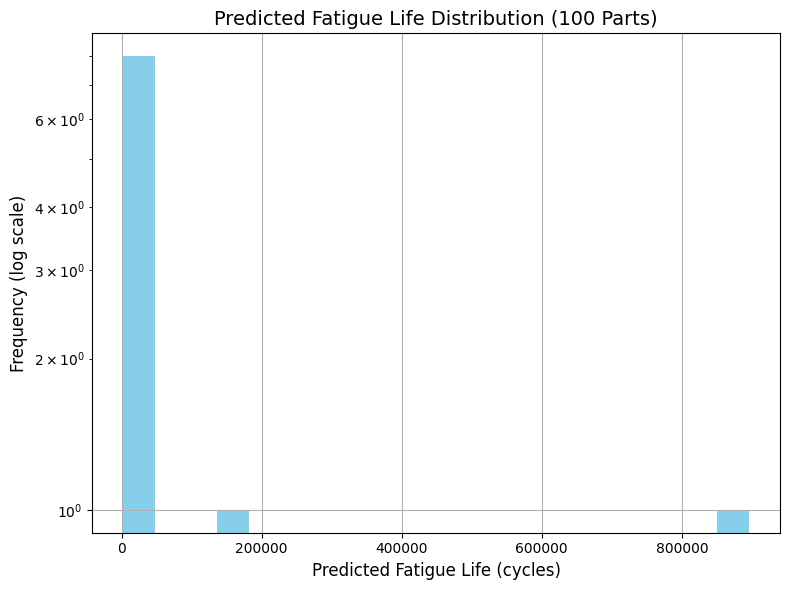

Minimum fatigue life: 2.77e+03 cycles
Maximum fatigue life: 8.95e+05 cycles
Mean fatigue life: 1.18e+05 cycles


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import rainflow  # For rainflow counting


# Set a random seed for reproducibility
np.random.seed(42)  # You can change the seed value to any integer to get different results

# Function to simulate variable amplitude loading for each part
def simulate_loading(time_points, part_index):
    # Introduce a wider range of loading amplitudes for different parts
    base_amplitude = np.random.uniform(10, 100)  # Random base amplitude for each part
    return base_amplitude * np.sin(0.01 * (time_points + part_index)) + \
           0.5 * base_amplitude * np.sin(0.05 * (time_points + part_index * 0.5)) + \
           np.random.randn(len(time_points)) * base_amplitude * 0.1  # Add small random noise

# Fatigue life calculation using damage accumulation (Miner's Rule)
def fatigue_life_from_rainflow(cycles, Nf_curve):
    total_damage = 0
    for amplitude, count in cycles:
        # Estimate fatigue life at the given amplitude using the Nf curve
        Nf = Nf_curve(amplitude)
        damage = count / Nf  # Miner's rule
        total_damage += damage
    return 1 / total_damage  # Return predicted fatigue life

# Modified fatigue curve (S-N or FS-based fatigue life) for a broader range
def Nf_curve(amplitude):
    # Adjusted S-N curve to span a broader range of cycles
    return 1e6 * (50 / amplitude) ** 3  # Modify amplitude ratio and exponent as needed

# Simulate 100 parts with different loading histories to span from 10^4 to 10^6 cycles
num_parts = 10
predicted_fatigue_lives = []

time = np.linspace(0, 1000, 10000)  # Simulated time points

for part_index in range(num_parts):
    # Generate unique variable amplitude loading for each part
    loading = simulate_loading(time, part_index)
    
    # Perform rainflow counting for this part
    cycles = list(rainflow.count_cycles(loading))
    
    # Calculate the fatigue life for this part
    fatigue_life = fatigue_life_from_rainflow(cycles, Nf_curve)
    
    # Store the fatigue life result
    predicted_fatigue_lives.append(fatigue_life)

# Convert to log scale (for plotting purposes)
predicted_fatigue_lives = np.array(predicted_fatigue_lives)

# Plot histogram of predicted fatigue lives (log scale)
plt.figure(figsize=(8, 6))
plt.hist(predicted_fatigue_lives, bins=20, color='skyblue', log=True)
plt.title('Predicted Fatigue Life Distribution (100 Parts)', fontsize=14)
plt.xlabel('Predicted Fatigue Life (cycles)', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Print summary of fatigue life distribution
print(f"Minimum fatigue life: {predicted_fatigue_lives.min():.2e} cycles")
print(f"Maximum fatigue life: {predicted_fatigue_lives.max():.2e} cycles")
print(f"Mean fatigue life: {predicted_fatigue_lives.mean():.2e} cycles")


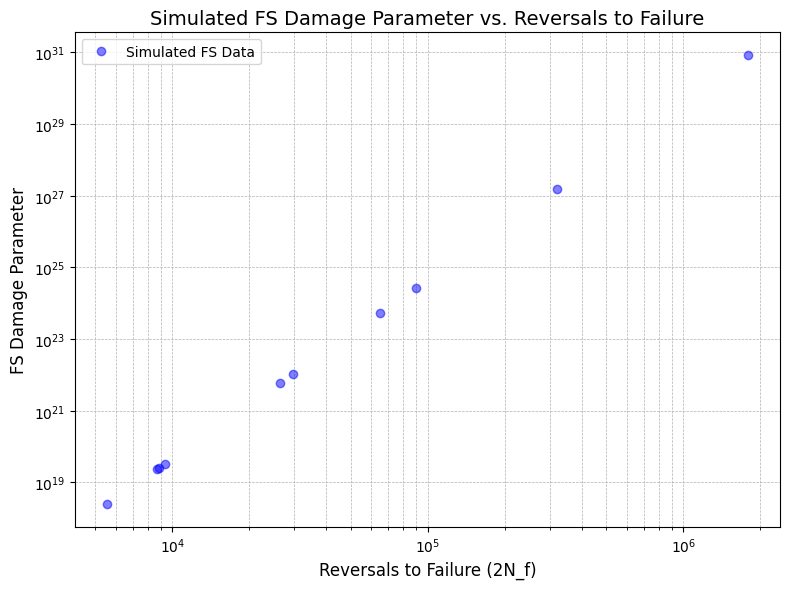

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation (aligned with observed trends in fatigue data)
tau_f_prime = 683  # Shear fatigue strength coefficient (τ'_f) in MPa
gamma_f_prime = 0.40  # Shear fatigue ductility coefficient (γ'_f)
b_0 = -0.055  # Adjusted Shear fatigue strength exponent (for decaying trend)
c_0 = -0.45  # Adjusted Shear fatigue ductility exponent (for decaying trend)
G = 45.7  # Shear modulus in MPa
sigma_n_max = 200  # Maximum normal stress in MPa
sigma_y = 526  # Yield strength in MPa
k = 1.5  # Material-dependent parameter for FS

# Generate simulated reversals to failure (log-distribution to simulate realistic fatigue life data)
Nf = predicted_fatigue_lives  # Simulating between 10^3 and 10^7 reversals to failure

# Simulating defect distribution (random voids, etc.)
defect_factor = np.random.uniform(0.95, 1.05, size=Nf.shape)  # Random defect multiplier (small variation)

# FS parameter calculation function (elastic + plastic strain components)
def fs_parameter_simulation(N, tau_f_prime, G, gamma_f_prime, b_0, c_0, sigma_n_max, sigma_y, k, defect_factor):
    elastic_term = (tau_f_prime / G) * (N ** b_0)
    plastic_term = gamma_f_prime * (N ** c_0)
    fs_value = elastic_term + plastic_term
    return fs_value

# Calculate the simulated FS parameters
fs_parameters_simulated = fs_parameter_simulation(Nf, tau_f_prime, G, gamma_f_prime, b_0, c_0, sigma_n_max, sigma_y, k, defect_factor)

# Plot the simulated FS parameters vs. reversals to failure (2N_f)
plt.figure(figsize=(8, 6))
plt.loglog(2 * Nf, fs_parameters_simulated, 'bo', alpha=0.5, label='Simulated FS Data')

# Add labels and title
plt.title('Simulated FS Damage Parameter vs. Reversals to Failure', fontsize=14)
plt.xlabel('Reversals to Failure (2N_f)', fontsize=12)
plt.ylabel('FS Damage Parameter', fontsize=12)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
